In [4]:
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline

import layers as layers
import model as mdl

import warnings
warnings.filterwarnings('ignore')

from costfunctions import mse
import minimizer

from mathtools import factorized_hidden_expectation, hidden_expectations
from mathtools import gradient_log_theta, gradient_log_theta_phaseI #, gradient_log_theta_phaseI_NEW


In [111]:
# Generate input grid
X = np.linspace(-10,10, 101)
X = X.reshape((1,X.shape[0]))

# E(h_i|v) diagonal Q

# Linear periodicity relation tests

In [ ]:
Q = np.diag([13])

X = np.linspace(-1000,1000, 100)
X = X.reshape((1,X.shape[0]))

#print(gradient_log_theta_phaseI(X.T -Q*60, Q, 0))

#print(gradient_log_theta(X.T, Q, 0)+60)

print(gradient_log_theta(X.T, Q, 0))

print(gradient_log_theta_phaseI(X.T, Q, 0))


In [ ]:
Q = np.zeros((2,2))
Q[0,0] = 1.5
Q[1,0] = -1.4
Q[0,1] = 1.4
Q[1,1] = 1.7


X1 = np.linspace(-60,60, 21)
X2 = np.linspace(-60,65, 21)

X=np.stack((X1,X2))

print(gradient_log_theta(X.T, Q, 0))
#gradient_log_theta_phaseI_NEW(X.T, Q, 0)

In [ ]:
Q = np.zeros((2,2))
Q[0,0] = 2
Q[1,0] = 0.13
Q[0,1] = 0.14
Q[1,1] = 1


X1 = np.linspace(-100,100, 100)
X2 = np.linspace(-100,100, 100)


X=np.stack((X1,X2))

n=np.zeros((2,1))
n[0,0]=2
n[1,0]=2

R=np.repeat(Q.dot(n),X.shape[1],axis=1)

R.shape
print(gradient_log_theta(X.T, Q, 0))
print(gradient_log_theta(X.T-R.T, Q, 0))-2


# Phase I

In [ ]:
# Setup and plot expectation
Q = np.diag([13])
B = np.zeros((1,1))
B[0,0] = 0
W = np.zeros((1,1))
W[0,0] = 2

X = np.linspace(-50,50, 101)
X = X.reshape((1,X.shape[0]))
E=factorized_hidden_expectation(X, B, W, Q, True)

#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')

plt.xlabel("$v$")
plt.ylabel("$E$")
plt.plot(X.flatten(), E[0],"b-", linewidth='5')

#plt.savefig("EhvPhaseI-1.eps", format="eps")

In [ ]:
E

In [ ]:
Q = np.diag([40])
B = np.zeros((1,1))
B[0,0] = 0.2
W = np.zeros((1,1))
W[0,0] = -0.18*130

X = np.linspace(-2,2, 101)
X = X.reshape((1,X.shape[0]))

E=factorized_hidden_expectation(X, B, W, Q)

plt.xlabel("$v$")
plt.ylabel("$E$")
plt.plot(X.flatten(), E[0],"b-", linewidth='5')

plt.savefig("EhvPhaseI-2.eps", format="eps")

In [ ]:
Q = np.diag([10])
B = np.zeros((1,1))
B[0,0] = -0.75
W = np.zeros((1,1))
W[0,0] = -0.18*13

X = np.linspace(-3,3, 101)
X = X.reshape((1,X.shape[0]))

E=factorized_hidden_expectation(X, B, W, Q)
plt.xlabel("$v$")
plt.ylabel("$E$")
plt.plot(X.flatten(), E[0],"b-", linewidth='5')

plt.savefig("EhvPhaseI-3.eps", format="eps")

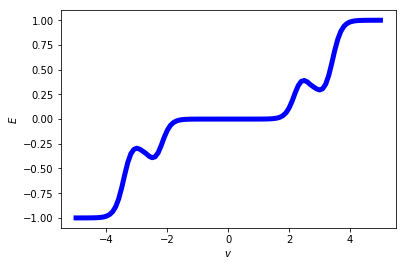

In [134]:
# Non-diagonal

Q = np.zeros((2,2))
Q[0,0] = 30
Q[1,0] = -7
Q[0,1] = -1
Q[1,1] = 38
B = np.zeros((1,2))
B[0,0] = 0
B[0,1] = 0
W = np.zeros((1,2))
W[0,0] = -5.4
W[0,1] = 8.2


X = np.linspace(-5,5, 101)
X = X.reshape((1,X.shape[0]))

E=hidden_expectations(X, B, W, Q)


plt.xlabel("$v$")
plt.ylabel("$E$")
plt.plot(X.flatten(), E[0],"b-", linewidth='5')



# Phase II

In [ ]:
Q = np.diag([13])
B = np.zeros((1,1), dtype=complex)
B[0,0] = 0.1j
W = np.zeros((1,1), dtype=complex)
W[0,0] = 2j

X = np.linspace(-3000,3000, 101)
X = X.reshape((1,X.shape[0]))
E=factorized_hidden_expectation(X, B, W, Q)

plt.plot(X.flatten(), -1j*E[0],"b-", linewidth='5')

In [ ]:
Q = np.diag([1])
B = np.zeros((1,1), dtype=complex)
B[0,0] = 0j
W = np.zeros((1,1), dtype=complex)
W[0,0] = 0.8j

X = np.linspace(-1000,1000, 101)
X = X.reshape((1,X.shape[0]))
E=factorized_hidden_expectation(X, B, W, Q)

plt.plot(X.flatten(), -1j*E[0],"b-", linewidth='5')

In [ ]:
Q = np.diag([0.2])
B = np.zeros((1,1), dtype=complex)
B[0,0] = -0.3j
W = np.zeros((1,1), dtype=complex)
W[0,0] = -0.9j

X = np.linspace(-1000,1000, 101)
X = X.reshape((1,X.shape[0]))
E=factorized_hidden_expectation(X, B, W, Q)

plt.plot(X.flatten(), -1j*E[0],"b-", linewidth='5')

In [ ]:
# Note: Check non-vanishing real/im parts (ROUNDING ERROR ?)